<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [5. Statistics](05.00-Statistics.ipynb) | [Contents](Index.ipynb) | [Theoretical Distributions](05.02-Theoretical-Distributions.ipynb) >

## 5.1 经验分布

大多数水文变量都是连续的，但由于我们的测量能力，我们对它们进行了离散测量。使用bin进行离散数据的分类，为离散数据的平均连续处理提供了手段。数据的底层分布的可视化是通过绘制直方图实现的。直方图描述离散区间上的频率。让我们从直方图开始。在下面的例子中，首先我们将生成一些虚拟的数据，然后计算并绘制直方图。

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

x = np.random.randn(100) #生成模拟数据

# 计算直方图
n,low_range,binsize,extrapoints = st.histogram(x)
upper_range = low_range + binsize*(len(n)-1)
bins = np.linspace(low_range,upper_range,len(n))

C:\Users\laihetao\AppData\Local\conda\conda\envs\DataProcess\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `histogram` is deprecated!
scipy.stats.histogram is deprecated in scipy 0.17.0; use np.histogram instead
  if __name__ == '__main__':


`st,histogram`提供了在每个区间(n)中bin的数量，bin的下限(low_range),bins的宽(binsize)，以及不用于计算直方图的点。由于bin的大小与所有的bin相同，所以Pyhon只提供一个bin的大小。我们使用bin 的下限和大小来计算bin的上限范围，然而计算所有bin的中农位数的值。现在可以使用`bar`绘制直方图。我们也将定义bar的宽度和颜色

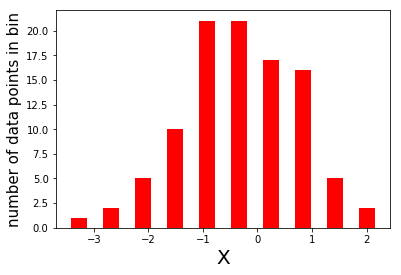

In [2]:
plt.bar(bins,n,width=0.3,color='red')
plt.xlabel('X',fontsize=20)
plt.ylabel('number of data points in bin',fontsize=15)
plt.show()

<center>图5.1:x的直方图</center>

数据的直方图如图5.1所示。在这个例子中，因为我们刚刚从正态分布创建了100个随机数，直方图没有展示正态分布应该显示的行为。

直方图中的每个bar都告诉我们，数据在特定的bin中有多少次。查看数据的行为的一个更好的方法是查看相对直方图，它告诉我们点在某一范围内发概率。通过将每个bin的频率除以所有箱中的频率之和，得到相对直方图或相对频率。相对直方图表示数据发生在bin中的数据的概率。要么是我们可以使用`histogram`函数先计算直方图，然后除以频率总数，要么是我们直接使用`relfreq`函数。`relfreq`提供了相对频率，连同其他与`histogram`类似的输出。

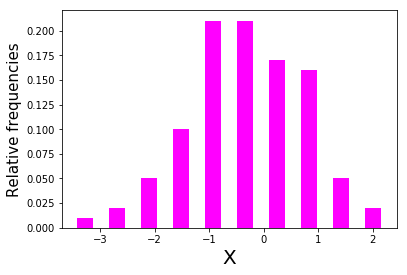

In [3]:
relfreqs,lowlim,binsize,extrapoints = st.relfreq(x)
plt.bar(bins,relfreqs,width=0.3,color='magenta')
plt.xlabel('X',fontsize=20)
plt.ylabel('Relative frequencies',fontsize=15)
plt.show()

<center>图5.2:$x$的相对直方图</center>

因为我们使用的是前面例子中使用的`x`，所以我们不重新计算`bins`。在这个柱状图中，我们使用`magenta`(洋红色)颜色。不同的颜色的图形，只是为了让你对颜色和字体大小更熟悉。它并不意味着我们应该使用与直方图不同的颜色作为相对频率图；没有什么阻止我们使用相同的颜色。

在相对直方图如图5.2所示。相对直方图告诉我们实验数据的如何表现的；在某些范围内数据有多少次(或者有多大概率)。相对直方图只告诉实验数据，关于我们拥有的数据。我们将来会得到什么数据呢？PDF是一个更好的指示器来说明将来的数据。随机变量的概率密度函数(pdf)是描述这个随机变量在给定点上发生的相对可能性的函数。随机变量落在某一特定区域的概率是由该区域上的变量密度的积分给出的的。概率密度函数在处处都是非负的，它在整个空间上的积分都等于1。我们可以用bin的大小除以相关频率得到pdf。一个简单的计算pdf的方法是使用`hist`函数。`hist`生成图形，并且还返回每个bin的pdf值。bin的数量由第二个参数来控制，在下面的例子中它被设为10。`bin`提供了bin的上下限，因此，它的长度比bin的数量多一个。除了颜色外，我们为`hist`函数指定了apha值。`alpha`值控制图的透明度；0.0意味着完全透明，1.0是表示完全不透明。PDF柱状图如图5.3所示。

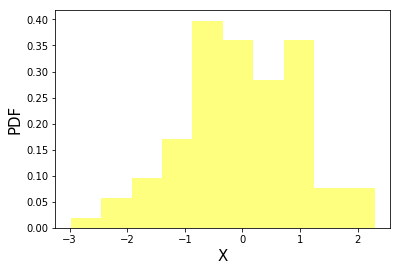

In [4]:
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='yellow', alpha=0.5)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

累计分布函数(CDF)描述了一个给定概率分布的实值随机变量$X$在小于或等于x的值上的概率。`cumfreq`提供了数据的乐际概率，可以用来计算CDF。如果我们用累计频率除以总频率，就得到CDF。累计频率的最后一个值等于总频率，因此我们用这个来计算CDF。CDF如图5.4所示。

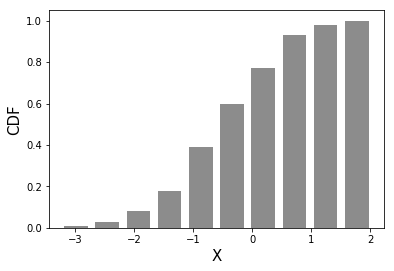

In [5]:
cumfreqs, lowlim, binsize, extrapoints = st.cumfreq(x)
plt.bar(bins[:-1], cumfreqs/cumfreqs[-1], width=0.4, color='black', alpha=0.45)
plt.xlabel('X', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show()

我们可以使用`scikits`库中的`CDF`函数直接估算经验累计分布函数(ECDF)。关于`scikits`的信息在这里http://pypi.python.org/pypi/scikits.statsmodels。
经验分布函数(CDF)是与样本的经验测量相关联的累积分布函数。这个cdf是一个阶梯函数，在n个数据点的每一个上跳起1/n。经验分布函数估计样本中各点的基本cdf。在前面的例子中，我们在将数据分类到一些bin后估计了CDF(ECDF)。这意味着，我们假设数据在一些小范围内以相似统计的方式表现。我们也可以估计CDF而不用做这个假设，这将使用`ECDF`函数来完成。`ECDF`函数的输出是存储数据值以及对应的ECDF的对象。使用`ecdf.x`检索数据，使用`ecdf.y`检索相应的ECDF。`ecdf`是你定义的用于存储`ECDF`函数输出的变量名。如果你使用其他名称，你需要使用相同的名字来检索`x`和`y`属性。

In [6]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

# 生成一些数据
data = np.random.randn(100)

#估计ecdf
ecdf = ECDF(data)

我们应该将ECDF作为一个阶梯图，因为每个ECDF都在一个小的区间上。ECDF图如图5.5所示。

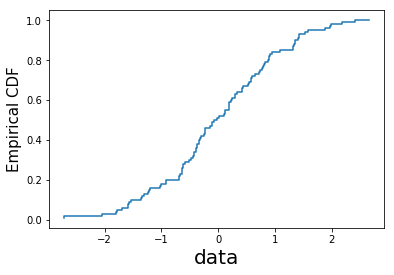

In [7]:
plt.step(ecdf.x,ecdf.y)
plt.xlabel('data',fontsize=20)
plt.ylabel('Empirical CDF',fontsize=15)
plt.show()

<center>图5.5：使用普通方法的经验观测CDF估计值</center>

我们也可以使用`ecdf`估计在任何数据值的ECDF。让我们在一些数据点(在零)评估和打印的ECDF的值。

In [8]:
print(ecdf(0))

0.5


用上述方法估计的经验CDF在阶梯函数中，看起来不太好。一种更好的估计ECDF的方法是使用kernel函数。这可以通过`statistics`模块完成。`statistics`模块提供了使用各种kernel函数用于估计PDF和CDF。`cpdf`函数用于估计CDF。我们还定义了kernal的名称(Epanechnikov)。可利用的kernal在`statiscics`库网站给出。在`legend`(图例)内部，在`legend`中，我们将图例的位置(loc)定义为`best`，这意味着Python会尝试将图例置于其中，以尽量减少对图的干扰。使用该曲线后的结果图如图5.6所示。从图中可以看出，与一般的ECDF估计方法相比，这显示了更平滑的变化。

In [9]:
import statistics #经测试仅适合于低版本python
y,x = statistics.cpdf(data,kernel='Epanechnikov')
plt.plot(ecdf.x,ecdf.y,label='Ordinary')
plt.plot(x,y,label='Kernel')
plt.xlabel('data',fontsize=20)
plt.ylabel('Empirical CDF',fontsize=15)
plt.legend(loc='best')
plt.show()

AttributeError: module 'statistics' has no attribute 'cpdf'